#RISK PREMIUM IN MOTOR VEHICLE INSURANCE

The **pure premium or risk premium** is the premium that would exactly meet
the expected cost of the risk covered ignoring management expenses, commissions,
contingency loading, etc

Claim frequency rate and mean claim size are required for estimation in calculating risk premiums with respect to different 

In this study, I discussed to estimate claim frequency rate and mean claim
size with several methods and calculated risk premiums. 


**Key words:** Number of Claims, Claim Sizes, Claim Frequency Rate, Risk
Premium.

Dataset, which supported my study, is provided by insurance company involving with motor vehicle insurance. I took the dataset from kanggle webisite

#1. Introduction 

**Insurance** is an important part of risk management programs for
organisations and individuals. Insurance is a risk financing transfer under which an **insurer** agrees to accept **financial burdens** arising from **loss**. More formally, **insurance** can be defined as a **contractual** agreement between two parties: the **insurer** and the **insured**.

Insurance may be **classified** into **three groups** – **insurance of person**,
**insurance of property** and **pecuniary interest**, and **insurance of liability**. General insurance, or Non-Life insurance or Property/Casualty insurance as it is sometimes called, normally relates to the insurance of property and liability.

In this study, I am interested in **motor vehicle insurance**. Motor
vehicle insurance contracts are schedule contracts that the permit the
insured to purchase both property and liability insurance under one
policy. The **contract** can be **divided**, however, in **two separate contracts**  one providing insurance against physical damage to automobiles, and the other protecting against potential liability arising out of the ownership, maintenance, or use of an automobile. Some automobile insurance
contracts, notably those issued by insurers associated with automobile
finance companies, cover only physical damage insurance.

#2. The Risk Premium 

The **pure premium or risk premium** is the premium that would exactly
meet the expected cost of the risk covered ignoring management expenses,
commissions, contingency loading, etc. **To compute it**, we need to estimate the **claim frequency rate** and **mean claim size**. Multiplying **claim frequency rate** by **mean claim size** yields the **risk premium**.

A **claim** is an assertion of a right to payment, as when a customer
notifies a manufacturer of an injury from a defective product and expenses a
belief that the injury justifies compensation. Usually, the payment is to occur at some future point in time. It should not be assumed that all accidents become
claims, nor that the **amount of the claim** will always be the **same** as the **amount of the damage**. 

The **claim size** is the sum, which the **insurer** has to **pay** on the
**occurrence** of a **fire**, an **accident**, death or some other **insured even**t. The sum of the individual claims constitutes the aggregate claim amount, which is one of the key concerns, both in the practical management of an insurance company and in theoretical consideration. 

The **claim frequency rate** is a rate which can be estimated as the number
of claims divided by the number of units of exposure.

It is important that the two components, claim frequency rate and claim
size be considered separately. Only in exceptional circumstances can the use of
‘rate of payment of claims’ be considered satisfactory for the assessment of a
risk premium

#3. Method of Study 

Analysis is based on simple formulations as follows (Hossack, 1989: 123-125):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy 

In [ ]:
df = pd.read_excel("AutoInsurance.xlsx")

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
#getting rid of the time in the dataset
df['Effective To Date']=pd.to_datetime(df['Effective To Date'])

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Adding another columns for how long the policy lasted with the company**

In [ ]:
import datetime
from datetime import timedelta

In [ ]:
def add_days_to_date(date, days):
    """Add days to a date and return the date.
    
    Args: 
        date (string): Date string in YYYY-MM-DD format. 
        days (int): Number of days to add to date
    
    Returns: 
        date (date): Date in YYYY-MM-DD with X days added. 
    """
    
    added_date = pd.to_datetime(date) + timedelta(days=days)
    added_date = added_date.strftime("%Y-%m-%d")

    return added_date

In [ ]:
list1 = []
for a,b in enumerate(list(df["Effective To Date"])):
  for c,d in enumerate(list(df["Months Since Policy Inception"])):
    if a == c:
      converted=add_days_to_date(b,d)
      list1.append(converted)
    else:
      pass


In [ ]:
df["Months Since Policy End Date"] = np.array(list1)

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months Since Policy End Date'],
      dtype='object')

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Months Since Policy End Date,Months Since Policy Year and Month End Date
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-03-01,2011-03
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-03-14,2011-03
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-03-29,2011-03
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-03-26,2011-03
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-03-19,2011-03


**Policy end dates**

In [ ]:
list2 = []
for i in list1:
  c = i[:7]
  list2.append(c)

In [ ]:
df["Months Since Policy Year and Month End Date"] = np.array(list2)

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months Since Policy End Date',
       'Months Since Policy Year and Month End Date'],
      dtype='object')

**Risk Premium, mean claim amount and NUmber of policies for each month after the policy ended**

In [ ]:
DF_MSPMED = df.groupby(["Months Since Policy Year and Month End Date"]).sum()[["Total Claim Amount", "Number of Policies"]]
DF_MSPMED["Risk Premium"] = DF_MSPMED["Total Claim Amount"]/ DF_MSPMED["Number of Policies"]
DF_MSPMED["Averange Claim Amount"] = df.groupby(["Months Since Policy Year and Month End Date"]).mean()["Total Claim Amount"]
DF_MSPMED.round(2)

,Total Claim Amount,Number of Policies,Risk Premium,Averange Claim Amount
Months Since Policy Year and Month End Date,,,,
2011-01,352194.41,2393,147.18,435.88
2011-02,865459.73,5968,145.02,433.60
2011-03,1263807.19,8698,145.30,430.75
2011-04,1044085.38,7167,145.68,435.58
2011-05,425533.33,2768,153.73,440.97
2011-06,13887.00,99,140.27,408.44


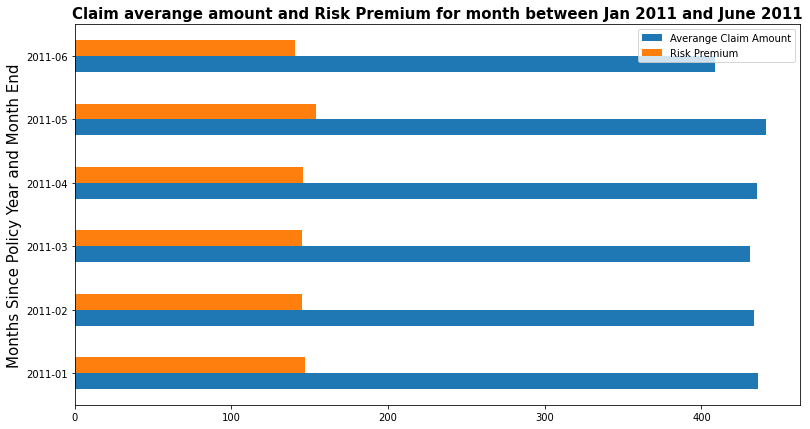

In [ ]:
from seaborn.axisgrid import FacetGrid
DF_MSPMED[["Averange Claim Amount", "Risk Premium"]].plot(kind="barh", figsize=(13,7))
plt.title("Claim averange amount and Risk Premium for month between Jan 2011 and June 2011",fontweight='bold' ,fontdict={"fontsize":15})
plt.ylabel("Months Since Policy Year and Month End",fontdict={"fontsize":15})
plt.show()

In [ ]:
data = DF_MSPMED[["Averange Claim Amount", "Risk Premium"]]
data

,Averange Claim Amount,Risk Premium
Months Since Policy Year and Month End Date,,
2011-01,435.884177,147.176939
2011-02,433.597058,145.016710
2011-03,430.745464,145.298596
2011-04,435.580051,145.679557
2011-05,440.967181,153.733139
2011-06,408.441224,140.272744


In [ ]:

total_runs = data["Averange Claim Amount"].sum()
print('Total runs scored by MS Dhoni: %s' % total_runs)

Total runs scored by MS Dhoni: 2585.2151547269063


In [ ]:

total_matches = data["Risk Premium"].sum()
print('Total matches played by MS Dhoni: %s' % total_matches)

Total matches played by MS Dhoni: 877.1776852473142


In [ ]:
percentage = []
for i in range(data.shape[0]):
    pct = (data["Averange Claim Amount"][i] / total_runs) * 100
    percentage.append(round(pct,2))
data['ACA_Percentage'] = percentage

percentage1 = []
for i in range(data.shape[0]):
    pct = (data["Risk Premium"][i] / total_runs) * 100
    percentage1.append(round(pct,2))
data['RP_Percentage'] = percentage1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data1=data[["ACA_Percentage","RP_Percentage"]]
data1

,ACA_Percentage,RP_Percentage
Months Since Policy Year and Month End Date,,
2011-01,16.86,5.69
2011-02,16.77,5.61
2011-03,16.66,5.62
2011-04,16.85,5.64
2011-05,17.06,5.95
2011-06,15.80,5.43


In [42]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [47]:
#data1[["ACA_Percentage", "RP_Percentage"]].plot(kind="barh", figsize=(13,7))
#plt.title("Claim averange amount and Risk Premium for month between Jan 2011 and June 2011",fontweight='bold' ,fontdict={"fontsize":15})
#plt.ylabel("Months Since Policy Year and Month End",fontdict={"fontsize":15})
#calling the function to add value labels
#addlabels(x, y)
#plt.show()

In [ ]:
#Creating a columns for Claim Frequency Rate per Customer
df['Risk Premium per Customer'] = df['Total Claim Amount']/df["Number of Policies"]

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months Since Policy End Date',
       'Months Since Policy Year and Month End Date', 'Effective To Month',
       'Risk Premium per Customer'],
      dtype='object')

**Distribution for Total Claim Size**

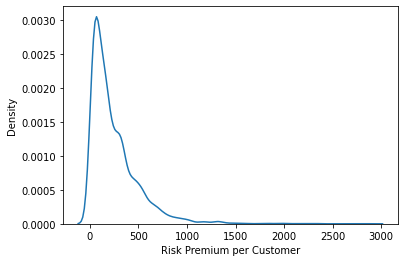

In [ ]:
sns.kdeplot(data=df["Risk Premium per Customer"])

In [ ]:
import seaborn as sns

In [ ]:
df[["Total Claim Amount"]].mode()

,Total Claim Amount
0,316.8


In [ ]:
df[["Total Claim Amount"]].describe()

,Total Claim Amount
count,9134.000000
mean,434.088794
std,290.500092
min,0.099007
25%,272.258244
50%,383.945434
75%,547.514839
max,2893.239678


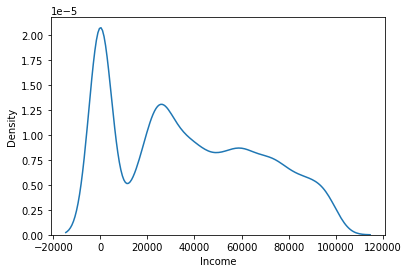

In [ ]:
sns.kdeplot(data=df["Income"])

**Finding the mean, mode, std, etc for the Risk Premium per Customer**

In [ ]:

df[["Risk Premium per Customer"]].describe()

,Risk Premium per Customer
count,9134.000000
mean,247.955966
std,250.045608
min,0.012376
25%,72.280199
50%,168.000000
75%,338.400000
max,2893.239678


In [ ]:
df[["Risk Premium per Customer"]].mode()

,Risk Premium per Customer
0,292.8


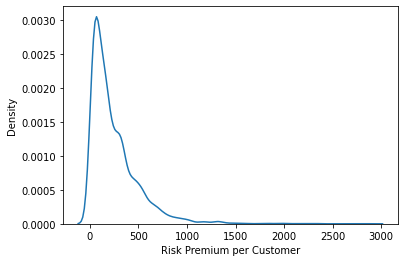

In [ ]:
#distribution for claim frequency rate for the past two month

sns.kdeplot(data=df["Risk Premium per Customer"])

In [ ]:
df.sort_values(by="Risk Premium per Customer", ascending=False)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Risk Premium per Customer
888,BZ65376,Arizona,8581.278701,No,Extended,Bachelor,2011-01-18,Medical Leave,M,27689,...,1,Personal Auto,Personal L2,Offer2,Web,2893.239678,Luxury SUV,Medsize,2011-01,2893.239678
5074,ZD75163,Nevada,9295.411150,No,Premium,High School or Below,2011-02-14,Unemployed,M,0,...,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize,2011-02,2759.794354
248,FO35655,Oregon,8672.229719,No,Extended,Bachelor,2011-01-14,Unemployed,M,0,...,1,Corporate Auto,Corporate L3,Offer1,Branch,2345.413441,Luxury SUV,Medsize,2011-01,2345.413441
3557,QO16222,California,6383.611136,No,Basic,College,2011-02-27,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer2,Call Center,2327.166394,Luxury SUV,Small,2011-02,2327.166394
7250,JN66901,Nevada,6601.611299,No,Basic,High School or Below,2011-02-08,Unemployed,M,0,...,1,Corporate Auto,Corporate L1,Offer4,Web,2306.508397,Luxury SUV,Medsize,2011-02,2306.508397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679,EM29019,Arizona,8447.888167,No,Basic,Bachelor,2011-02-18,Employed,F,61337,...,9,Personal Auto,Personal L2,Offer1,Call Center,2.540090,SUV,Medsize,2011-02,0.282232
3881,KC14861,Oregon,14886.706020,No,Basic,High School or Below,2011-02-11,Employed,M,91193,...,6,Personal Auto,Personal L1,Offer1,Web,1.587888,Luxury SUV,Medsize,2011-02,0.264648
45,HG65722,Oregon,12819.102890,No,Premium,Doctor,2011-01-25,Disabled,F,10105,...,3,Personal Auto,Personal L2,Offer1,Branch,0.517753,SUV,Medsize,2011-01,0.172584
5239,IS30186,California,6186.497831,No,Extended,College,2011-01-31,Employed,F,88375,...,3,Personal Auto,Personal L2,Offer2,Agent,0.423310,Four-Door Car,Medsize,2011-01,0.141103


#  **CLAIM MEAN SIZE**

1. Depending on yearly total claim sizes and number of claims, mean
claim sizes for each year can be calculated by the formula 

**MCS = TCS/C**

Where

*   **MCS**: Mean claim size in year i
*   **TCS**: Total claim size in year i
*   **C**: Number of claims for each year 

**Even though the formula is based on the yearly basis, calculation of mean size is calculated based on different parameters which inlcudes:**

*   Effective Month
*   State
*   Response
*   Education
*   Employement Status
*   Vehicle Class
*   Vehicle Size etcs

In [ ]:
#mean claim size for effective to month

df.groupby(['Effective To Month']).mean()['Total Claim Amount']

Effective To Month
2011-01    432.246398
2011-02    436.219119
Name: Total Claim Amount, dtype: float64

In [ ]:
#Mean claim size from Jan to feb 2011

df.describe()["Total Claim Amount"][1:2]

mean    434.088794
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each state
df.groupby(['State']).mean()['Total Claim Amount']

State
Arizona       425.361446
California    437.819268
Nevada        438.750566
Oregon        433.012542
Washington    436.343596
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Responce
df.groupby(['Response']).mean()['Total Claim Amount']

Response
No     432.084497
Yes    446.080868
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Coverange
df.groupby(['Coverage']).mean()['Total Claim Amount']

Coverage
Basic       379.036312
Extended    480.578885
Premium     651.390241
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Education

df.groupby(['Education']).mean()['Total Claim Amount']

Education
Bachelor                427.993988
College                 423.812895
Doctor                  338.186584
High School or Below    487.189739
Master                  350.237366
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each EmploymentStatus	

df.groupby(['EmploymentStatus']).mean()['Total Claim Amount']

EmploymentStatus
Disabled         474.711480
Employed         358.275705
Medical Leave    471.933903
Retired          489.901069
Unemployed       599.579795
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Gender	

df.groupby(['Gender']).mean()['Total Claim Amount']

Gender
F    412.856483
M    456.184439
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Vehicle Size
	

df.groupby(['Vehicle Size']).mean()['Total Claim Amount']

Vehicle Size
Large      426.063559
Medsize    420.075376
Small      489.425571
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Policy
	

df.groupby(['Policy']).mean()['Total Claim Amount']

Policy
Corporate L1    437.787660
Corporate L2    439.183340
Corporate L3    422.460088
Personal L1     441.062637
Personal L2     433.757310
Personal L3     433.235047
Special L1      463.236864
Special L2      432.603295
Special L3      439.041442
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Policy Type
	

df.groupby(['Policy Type']).mean()['Total Claim Amount']

Policy Type
Corporate Auto    430.312188
Personal Auto     434.828219
Special Auto      440.472770
Name: Total Claim Amount, dtype: float64

In [ ]:
#mean claim size for each Vehicle Class	
	

df.groupby(['Vehicle Class']).mean()['Total Claim Amount']

Vehicle Class
Four-Door Car     351.760366
Luxury Car       1130.288964
Luxury SUV       1092.525076
SUV               569.572999
Sports Car        558.148000
Two-Door Car      350.542917
Name: Total Claim Amount, dtype: float64

#  **Average office premium per policies**

2. Depending on yearly total amount of premiums and number of policies, average office premium per policy for each year can be calculated by the formula 


AOP = TOP/N

**Where**:

*   **AOP** : average office premium per policies for year i. 
*   **TOP** : total amount of premiums for year i
*   **N** : number of policies in year i

**Even though the formula is based on the yearly basis, calculation of mean size is calculated based on different parameters which inlcudes:**

*   Effective Month
*   State
*   Response
*   Education
*   Employement Status
*   Vehicle Class
*   Vehicle Size etcs

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Effective To Month'],
      dtype='object')

**Average office premium per policies for effective to month**

In [ ]:
#average office premium per policies for Effective To Month.
df_premiunETM = df.groupby(["Effective To Month"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunETM["Avg office premium per policies"] = df_premiunETM["Monthly Premium Auto"]/df_premiunETM['Number of Policies']
df_premiunETM

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Effective To Month,,,
2011-01,454791,14427,31.523602
2011-02,396674,12666,31.318017


**Average office premium per policies for each state**

In [ ]:
#average office premium per policies for each state.
df_premiuns = df.groupby(["State"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiuns["Avg office premium per policies"] = df_premiuns["Monthly Premium Auto"]/df_premiuns['Number of Policies']
df_premiuns

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
State,,,
Arizona,156480,5224,29.954058
California,294510,9348,31.505135
Nevada,83154,2449,33.954267
Oregon,243880,7735,31.529412
Washington,73441,2337,31.425332


**average office premium per policies for each Response**

In [ ]:
#average office premium per policies for each Response.
df_premiunR = df.groupby(["Response"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunR["Avg office premium per policies"] = df_premiunR["Monthly Premium Auto"]/df_premiunR['Number of Policies']
df_premiunR

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Response,,,
No,728327,23373,31.161041
Yes,123138,3720,33.101613


**average office premium per policies for each Coverage**

In [ ]:
#average office premium per policies for each Coverage.
df_premiunC = df.groupby(["Coverage"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunC["Avg office premium per policies"] = df_premiunC["Monthly Premium Auto"]/df_premiunC['Number of Policies']
df_premiunC

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Coverage,,,
Basic,457544,16629,27.514824
Extended,284015,8100,35.063580
Premium,109906,2364,46.491540


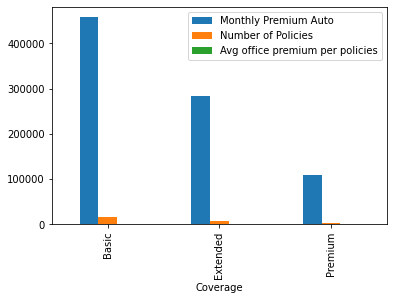

In [ ]:
df_premiunC.plot(kind="bar")

**Average office premium per policies for each Education**

In [ ]:
#average office premium per policies for each Education
df_premiunE = df.groupby(["Education"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunE["Avg office premium per policies"] = df_premiunE["Monthly Premium Auto"]/df_premiunE['Number of Policies']
df_premiunE

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Education,,,
Bachelor,254178,8193,31.023801
College,248436,7758,32.023202
Doctor,31024,1030,30.120388
High School or Below,248142,7942,31.244271
Master,69685,2170,32.112903


In [ ]:
#average office premium per policies for each EmploymentStatus
df_premiunES = df.groupby(["EmploymentStatus"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunES["Avg office premium per policies"] = df_premiunES["Monthly Premium Auto"]/df_premiunES['Number of Policies']
df_premiunES

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
EmploymentStatus,,,
Disabled,37938,1169,32.453379
Employed,531126,16924,31.383006
Medical Leave,38885,1288,30.190217
Retired,25780,736,35.027174
Unemployed,217736,6976,31.212156


In [ ]:
#average office premium per policies for each Gender
df_premiunG = df.groupby(["Gender"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunG["Avg office premium per policies"] = df_premiunG["Monthly Premium Auto"]/df_premiunG['Number of Policies']
df_premiunG

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Gender,,,
F,433600,13639,31.791187
M,417865,13454,31.058793


In [ ]:
#average office premium per policies for each Vehicle Size
df_premiunVS = df.groupby(["Vehicle Size"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunVS["Avg office premium per policies"] = df_premiunVS["Monthly Premium Auto"]/df_premiunVS['Number of Policies']
df_premiunVS

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Vehicle Size,,,
Large,86525,2669,32.418509
Medsize,600850,19115,31.433429
Small,164090,5309,30.907892


**average office premium per policies for each Policy Type**

In [ ]:
#average office premium per policies for each Policy Type
df_premiunPT = df.groupby(["Policy Type"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunPT["Avg office premium per policies"] = df_premiunPT["Monthly Premium Auto"]/df_premiunPT['Number of Policies']
df_premiunPT

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Policy Type,,,
Corporate Auto,183493,5873,31.243487
Personal Auto,632851,20132,31.435078
Special Auto,35121,1088,32.280331


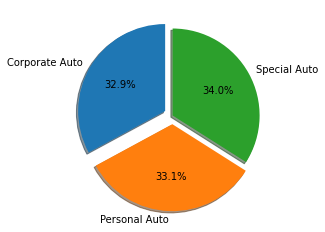

In [ ]:
plt.pie(df_premiunPT["Avg office premium per policies"], labels=df_premiunPT.index, autopct="%1.1f%%",explode=[0.1,0.1,0], shadow=True, startangle=90)
plt.show()

**average office premium per policies for each Vehicle Class**

In [ ]:
#average office premium per policies for each Vehicle Class
df_premiunVC = df.groupby(["Vehicle Class"]).sum()[['Monthly Premium Auto', 'Number of Policies']]
df_premiunVC["Avg office premium per policies"] = df_premiunVC["Monthly Premium Auto"]/df_premiunVC['Number of Policies']
df_premiunVC

,Monthly Premium Auto,Number of Policies,Avg office premium per policies
Vehicle Class,,,
Four-Door Car,357775,13818,25.891953
Luxury Car,34575,486,71.141975
Luxury SUV,39226,534,73.456929
SUV,215815,5170,41.743714
Sports Car,58989,1467,40.210634
Two-Door Car,145085,5618,25.825027


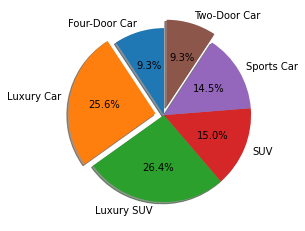

<Figure size 2880x720 with 0 Axes>

In [ ]:
plt.pie(df_premiunVC["Avg office premium per policies"], labels=df_premiunVC.index, autopct="%1.1f%%",explode=[0,0.1,0,0,0,0.1], shadow=True, startangle=90)
plt.figure(figsize=(40,10))
plt.show()

#  **Risk Premium (RP)**

3. Depending on yearly total claim sizes and number of policies, risk
premium for each year can be calculated by the formula 

RP = TCS/N

**Where**:

*   **RP**: Risk Premium for year i
*   **TCS**: Total Claim size for year i
*   **N**: Number of policies in year i

**Even though the formula is based on the yearly basis, calculation of mean size is calculated based on different parameters which inlcudes:**

*   Effective Month
*   State
*   Response
*   Education
*   Employement Status
*   Vehicle Class
*   Vehicle Size etcs

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Effective To Month'],
      dtype='object')

**Calculating the risk premium per Effective To Month**

In [ ]:
df1 = df.groupby(['Effective To Month']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Effective To Month']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumETM = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumETM.rename(columns={'key_0':'Effective To Month'}, inplace=True)
#setting state to index
df_riskpremiumETM.set_index("Effective To Month", inplace=True)
#calculating the risk premium per Effective To Month
df_riskpremiumETM['Total Claim Amount'] = df_riskpremiumETM['Total Claim Amount'].round(0)
df_riskpremiumETM["Risk Premium"] = df_riskpremiumETM['Total Claim Amount']/df_riskpremiumETM['Number of Policies']
df_riskpremiumETM

,Total Claim Amount,Number of Policies,Risk Premium
Effective To Month,,,
2011-01,2117143.0,4898,432.246427
2011-02,1847824.0,4236,436.219075


**Calculating the risk premium per state**

In [ ]:
df1 = df.groupby(['State']).sum()[['Total Claim Amount']]
df2 = df.groupby(['State']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumstate = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumstate.rename(columns={'key_0':'State'}, inplace=True)
#setting state to index
df_riskpremiumstate.set_index("State", inplace=True)
#calculating the risk premium per state
df_riskpremiumstate['Total Claim Amount'] = df_riskpremiumstate['Total Claim Amount'].round(0)
df_riskpremiumstate["Risk Premium"] = df_riskpremiumstate['Total Claim Amount']/df_riskpremiumstate['Number of Policies']
df_riskpremiumstate

,Total Claim Amount,Number of Policies,Risk Premium
State,,,
Arizona,724391.0,1703,425.361715
California,1379131.0,3150,437.819365
Nevada,386978.0,882,438.750567
Oregon,1126266.0,2601,433.012687
Washington,348202.0,798,436.343358


**Calculating the risk premium per Response**

In [ ]:
df1 = df.groupby(['Response']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Response']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumResponse = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumResponse.rename(columns={'key_0':'Response'}, inplace=True)
#setting state to index
df_riskpremiumResponse.set_index("Response", inplace=True)
#calculating the risk premium per Response
df_riskpremiumResponse['Total Claim Amount'] = df_riskpremiumResponse['Total Claim Amount'].round(0)
df_riskpremiumResponse["Risk Premium"] = df_riskpremiumResponse['Total Claim Amount']/df_riskpremiumResponse['Number of Policies']
df_riskpremiumResponse

,Total Claim Amount,Number of Policies,Risk Premium
Response,,,
No,3381493.0,7826,432.084462
Yes,583474.0,1308,446.081040


**Calculating the risk premium per Education**

In [ ]:
df1 = df.groupby(['Education']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Education']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumEducation = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumEducation.rename(columns={'key_0':'Education'}, inplace=True)
#setting state to index
df_riskpremiumEducation.set_index("Education", inplace=True)
#calculating the risk premium per Education
df_riskpremiumEducation['Total Claim Amount'] = df_riskpremiumEducation['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumEducation["Risk Premium"] = df_riskpremiumEducation['Total Claim Amount']/df_riskpremiumEducation['Number of Policies']
df_riskpremiumEducation

,Total Claim Amount,Number of Policies,Risk Premium
Education,,,
Bachelor,1176127.0,2748,427.993814
College,1136242.0,2681,423.812756
Doctor,115660.0,342,338.187135
High School or Below,1277411.0,2622,487.189550
Master,259526.0,741,350.237517


**Calculating the risk premium per EmploymentStatus**

In [ ]:
df1 = df.groupby(['EmploymentStatus']).sum()[['Total Claim Amount']]
df2 = df.groupby(['EmploymentStatus']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumEmploymentStatus = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumEmploymentStatus.rename(columns={'key_0':'EmploymentStatus'}, inplace=True)
#setting state to index
df_riskpremiumEmploymentStatus.set_index("EmploymentStatus", inplace=True)
#calculating the risk premium per EmploymentStatus
df_riskpremiumEmploymentStatus['Total Claim Amount'] = df_riskpremiumEmploymentStatus['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumEmploymentStatus["Risk Premium"] = df_riskpremiumEmploymentStatus['Total Claim Amount']/df_riskpremiumEmploymentStatus['Number of Policies']
df_riskpremiumEmploymentStatus

,Total Claim Amount,Number of Policies,Risk Premium
EmploymentStatus,,,
Disabled,192258.0,405,474.711111
Employed,2041455.0,5698,358.275711
Medical Leave,203875.0,432,471.932870
Retired,138152.0,282,489.900709
Unemployed,1389226.0,2317,599.579629


**Calculating the risk premium per Gender**

In [ ]:
df1 = df.groupby(['Gender']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Gender']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumGender = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumGender.rename(columns={'key_0':'Gender'}, inplace=True)
#setting state to index
df_riskpremiumGender.set_index("Gender", inplace=True)
#calculating the risk premium per state
df_riskpremiumGender['Total Claim Amount'] = df_riskpremiumGender['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumGender["Risk Premium"] = df_riskpremiumGender['Total Claim Amount']/df_riskpremiumGender['Number of Policies']
df_riskpremiumGender

,Total Claim Amount,Number of Policies,Risk Premium
Gender,,,
F,1923085.0,4658,412.856376
M,2041882.0,4476,456.184540


**Calculating the risk premium per Vehicle Class**

In [ ]:
df1 = df.groupby(['Vehicle Class']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Vehicle Class']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumVehicleClass = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumVehicleClass.rename(columns={'key_0':'Vehicle Class'}, inplace=True)
#setting state to index
df_riskpremiumVehicleClass.set_index("Vehicle Class", inplace=True)
#calculating the risk premium per state
df_riskpremiumVehicleClass['Total Claim Amount'] = df_riskpremiumVehicleClass['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumVehicleClass["Risk Premium"] = df_riskpremiumVehicleClass['Total Claim Amount']/df_riskpremiumVehicleClass['Number of Policies']
df_riskpremiumVehicleClass

,Total Claim Amount,Number of Policies,Risk Premium
Vehicle Class,,,
Four-Door Car,1625485.0,4621,351.760441
Luxury Car,184237.0,163,1130.288344
Luxury SUV,201025.0,184,1092.527174
SUV,1022953.0,1796,569.572940
Sports Car,270144.0,484,558.148760
Two-Door Car,661124.0,1886,350.542948


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


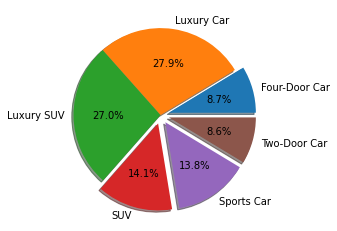

In [ ]:
plt.pie(df_riskpremiumVehicleClass[["Risk Premium"]], labels=df_riskpremiumVehicleClass.index, explode=[0.1,0,0,0.1,0.1,0.1], shadow=True, autopct="%1.1f%%")
plt.show()

**Calculating the risk premium per Vehicle Size**

In [ ]:
df1 = df.groupby(['Vehicle Size']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Vehicle Size']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumVehicleSize = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumVehicleSize.rename(columns={'key_0':'Vehicle Size'}, inplace=True)
#setting state to index
df_riskpremiumVehicleSize.set_index("Vehicle Size", inplace=True)
#calculating the risk premium per Vehicle Size
df_riskpremiumVehicleSize['Total Claim Amount'] = df_riskpremiumVehicleSize['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumVehicleSize["Risk Premium"] = df_riskpremiumVehicleSize['Total Claim Amount']/df_riskpremiumVehicleSize['Number of Policies']
df_riskpremiumVehicleSize

,Total Claim Amount,Number of Policies,Risk Premium
Vehicle Size,,,
Large,403056.0,946,426.063425
Medsize,2698564.0,6424,420.075342
Small,863347.0,1764,489.425737


**Calculating the risk premium per Policy Type**

In [ ]:
df1 = df.groupby(['Policy Type']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Policy Type']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumPolicyType = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumPolicyType.rename(columns={'key_0':'Policy Type'}, inplace=True)
#setting state to index
df_riskpremiumPolicyType.set_index("Policy Type", inplace=True)
#calculating the risk premium per Vehicle Size
df_riskpremiumPolicyType['Total Claim Amount'] = df_riskpremiumPolicyType['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumPolicyType["Risk Premium"] = df_riskpremiumPolicyType['Total Claim Amount']/df_riskpremiumPolicyType['Number of Policies']
df_riskpremiumPolicyType

,Total Claim Amount,Number of Policies,Risk Premium
Policy Type,,,
Corporate Auto,846854.0,1968,430.311992
Personal Auto,2951614.0,6788,434.828226
Special Auto,166499.0,378,440.473545


**Calculating the risk premium per Coverage**

In [ ]:
df1 = df.groupby(['Coverage']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Coverage']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumCoverage = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumCoverage.rename(columns={'key_0':'Coverage'}, inplace=True)
#setting state to index
df_riskpremiumCoverage.set_index("Coverage", inplace=True)
#calculating the risk premium per Vehicle Size
df_riskpremiumCoverage['Total Claim Amount'] = df_riskpremiumCoverage['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumCoverage["Risk Premium"] = df_riskpremiumCoverage['Total Claim Amount']/df_riskpremiumCoverage['Number of Policies']
df_riskpremiumCoverage

,Total Claim Amount,Number of Policies,Risk Premium
Coverage,,,
Basic,2110474.0,5568,379.036279
Extended,1317747.0,2742,480.578775
Premium,536746.0,824,651.390777


**Calculating the risk premium per Marital Status**

In [ ]:
df1 = df.groupby(['Marital Status']).sum()[['Total Claim Amount']]
df2 = df.groupby(['Marital Status']).count()[['Number of Policies']]
#adding the two dataset together
df_riskpremiumMaritalStatus = df1.merge(df2, on=df1.index)
#renaming the columns
df_riskpremiumMaritalStatus.rename(columns={'key_0':'Marital Status'}, inplace=True)
#setting state to index
df_riskpremiumMaritalStatus.set_index("Marital Status", inplace=True)
#calculating the risk premium per Vehicle Size
df_riskpremiumMaritalStatus['Total Claim Amount'] = df_riskpremiumMaritalStatus['Total Claim Amount'].round(0) #round off to the whole number
#find the risk premium
df_riskpremiumMaritalStatus["Risk Premium"] = df_riskpremiumMaritalStatus['Total Claim Amount']/df_riskpremiumMaritalStatus['Number of Policies']
df_riskpremiumMaritalStatus

,Total Claim Amount,Number of Policies,Risk Premium
Marital Status,,,
Divorced,552672.0,1369,403.704894
Married,2037171.0,5298,384.516988
Single,1375124.0,2467,557.407377


# **Averange office premium** 

4. Depending on yearly office premium and risk premium, the ratio
can be calculated by the formula

k = AOP/RP

where:

*   **AOP**: Averange office premium for year i
*   **RP**: Risk premium for year i
*   **ki**: denotes the ratio of office premium to risk premium for
year i. 

**Even though the formula is based on the yearly basis, calculation of mean size is calculated based on different parameters which inlcudes:**

*   Effective Month
*   State
*   Response
*   Education
*   Employement Status
*   Vehicle Class
*   Vehicle Size etcs

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Effective To Month'],
      dtype='object')

**Averange office premium for the Effective Month**

In [ ]:
#Getting the avg office premium for Effective To Mont from first dataset
df_k1 = df_premiunETM[["Avg office premium per policies"]]
#Getting the risk premium for Effective To Mont from first dataset
df_k2 = df_riskpremiumETM[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to Effective To Mont
df_OPR.rename(columns={'key_0':'Effective To Month'}, inplace=True)
#setting the column to Index
df_OPR.set_index("Effective To Month", inplace=True)
#Calculating the ratio for Averange Office Premium for Effective To Mont
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
Effective To Month,,,
2011-01,31.523602,432.246427,0.072930
2011-02,31.318017,436.219075,0.071794


**Averange office premium for the state**

In [ ]:
#Getting the avg office premium for State from first dataset
df_k1 = df_premiuns[["Avg office premium per policies"]]
#Getting the risk premium for State from first dataset
df_k2 = df_riskpremiumstate[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to state
df_OPR.rename(columns={'key_0':'State'}, inplace=True)
#setting the column to Index
df_OPR.set_index("State", inplace=True)
#Calculating the ratio for Averange Office Premium for each state
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
State,,,
Arizona,29.954058,425.361715,0.070420
California,31.505135,437.819365,0.071959
Nevada,33.954267,438.750567,0.077389
Oregon,31.529412,433.012687,0.072814
Washington,31.425332,436.343358,0.072020


**Averange office premium for the Response**

In [ ]:
#Getting the avg office premium for Response from first dataset
df_k1 = df_premiunR[["Avg office premium per policies"]]
#Getting the risk premium for Response from first dataset
df_k2 = df_riskpremiumResponse[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to Response
df_OPR.rename(columns={'key_0':'Response'}, inplace=True)
#setting the column to Index
df_OPR.set_index("Response", inplace=True)
#Calculating the ratio for Averange Office Premium for each Response
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
Response,,,
No,31.161041,432.084462,0.072118
Yes,33.101613,446.081040,0.074205


**Averange office premium for the Education**

In [ ]:
#Getting the avg office premium for Education from first dataset
df_k1 = df_premiunE[["Avg office premium per policies"]]
#Getting the risk premium for Education from first dataset
df_k2 = df_riskpremiumEducation[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to Education
df_OPR.rename(columns={'key_0':'Education'}, inplace=True)
#setting the column to Index
df_OPR.set_index("Education", inplace=True)
#Calculating the ratio for Averange Office Premium for each Education
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
Education,,,
Bachelor,31.023801,427.993814,0.072487
College,32.023202,423.812756,0.075560
Doctor,30.120388,338.187135,0.089064
High School or Below,31.244271,487.189550,0.064132
Master,32.112903,350.237517,0.091689


**Averange office premium for the EmploymentStatus**

In [ ]:
#Getting the avg office premium for EmploymentStatus from first dataset
df_k1 = df_premiunES[["Avg office premium per policies"]]
#Getting the risk premium for EmploymentStatus from first dataset
df_k2 = df_riskpremiumEmploymentStatus[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to EmploymentStatus
df_OPR.rename(columns={'key_0':'EmploymentStatus'}, inplace=True)
#setting the column to Index
df_OPR.set_index("EmploymentStatus", inplace=True)
#Calculating the ratio for Averange Office Premium for each EmploymentStatus
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
EmploymentStatus,,,
Disabled,32.453379,474.711111,0.068364
Employed,31.383006,358.275711,0.087595
Medical Leave,30.190217,471.932870,0.063971
Retired,35.027174,489.900709,0.071499
Unemployed,31.212156,599.579629,0.052057


**Averange office premium for the Gender**

In [ ]:
#Getting the avg office premium for Gender from first dataset
df_k1 = df_premiunG[["Avg office premium per policies"]]
#Getting the risk premium for Gender from first dataset
df_k2 = df_riskpremiumGender[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to Gender
df_OPR.rename(columns={'key_0':'Gender'}, inplace=True)
#setting the column to Index
df_OPR.set_index("Gender", inplace=True)
#Calculating the ratio for Averange Office Premium for each Gender
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
Gender,,,
F,31.791187,412.856376,0.077003
M,31.058793,456.184540,0.068084


**Averange office premium for the Vehicle Class**

In [ ]:
#Getting the avg office premium for Vehicle Class from first dataset
df_k1 = df_premiunVC[["Avg office premium per policies"]]
#Getting the risk premium for Vehicle Class from first dataset
df_k2 = df_riskpremiumVehicleClass[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to Vehicle Class
df_OPR.rename(columns={'key_0':'Vehicle Class'}, inplace=True)
#setting the column to Index
df_OPR.set_index("Vehicle Class", inplace=True)
#Calculating the ratio for Averange Office Premium for each Vehicle Class
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
Vehicle Class,,,
Four-Door Car,25.891953,351.760441,0.073607
Luxury Car,71.141975,1130.288344,0.062941
Luxury SUV,73.456929,1092.527174,0.067236
SUV,41.743714,569.572940,0.073289
Sports Car,40.210634,558.148760,0.072043
Two-Door Car,25.825027,350.542948,0.073672


**Averange office premium for the Vehicle Size**

In [ ]:
#Getting the avg office premium for 'Vehicle Size from first dataset
df_k1 = df_premiunVS[["Avg office premium per policies"]]
#Getting the risk premium for 'Vehicle Size from first dataset
df_k2 = df_riskpremiumVehicleSize[["Risk Premium"]]
#merging the columns together
df_OPR = df_k1.merge(df_k2, on=df_k1.index)
#Renaming the column to 'Vehicle Size
df_OPR.rename(columns={'key_0':'Vehicle Size'}, inplace=True)
#setting the column to Index
df_OPR.set_index("Vehicle Size", inplace=True)
#Calculating the ratio for Averange Office Premium for each 'Vehicle Size
df_OPR["Office_Premium/RP Ratio"] = df_OPR['Avg office premium per policies']/df_OPR['Risk Premium']
#displaying the table
df_OPR

,Avg office premium per policies,Risk Premium,Office_Premium/RP Ratio
Vehicle Size,,,
Large,32.418509,426.063425,0.076088
Medsize,31.433429,420.075342,0.074828
Small,30.907892,489.425737,0.063151


# **Fixed claim frequency rate**

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

A **fixed claim frequency rate** can be calculated depending on the
**total number of policies** and the **total number of claims**.
In fact, **claim frequency rate** is the **ratio** of the **number of claims** in a **period** to the **exposure to risk** for this **period**. The **main problem** in **calculating claim frequency rate** is to **find the exposure to risk** can be **calculated** by various methods. One of them is the **Census Method**.

Let **N(t)** denote the **number of policies** booked by the **insurance**
**company** at **time t**. During the short interval of time **δt** immediately following **time t**, the **change** in **the number of policyholders** a premium will be **negligible**.
Each of the **N(t) premium policyholders** currently on the books will **contribute δt years** of **exposure** during that **small time interval** so that the total number of years’ exposure during the interval of **time δt** following time t will be **N(t)δt** .

The total exposure during 1997-1998 will, therefore, be approximately

      ∑ N(t)δt
    t=0 to 1
    in steps
    of δt

the calculation becomes more and more accurate the smaller δt
becomes, and exact when δt becomes too small. Then in mathematical terms dt
is written instead of δt , and becomes

Intergral (N(t)dt)

from 1 to 0


i.e. the area under the N(t) curve between t=0 and t=1.

For example, when data given in Table 4.2 is considered Figure 4.1 is the
approximate graph of N(t).

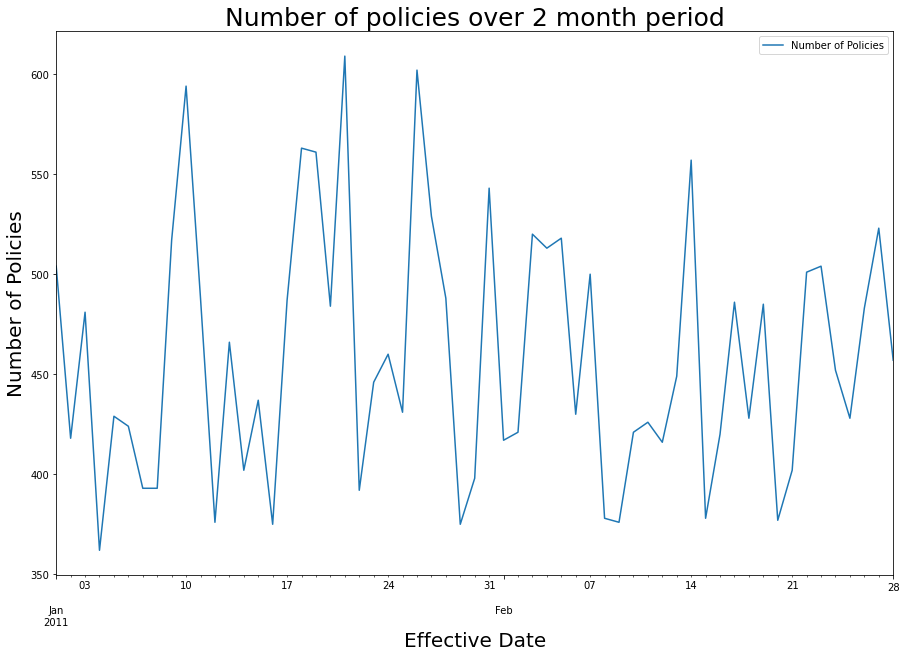

In [ ]:
#graphs indicating the number of policies from jan to feb
df.groupby(['Effective To Date']).sum()[["Number of Policies"]].plot(kind='line', figsize=(15,10))
plt.title("Number of policies over 2 month period", fontdict={"fontsize":25})
plt.ylabel("Number of Policies", fontdict={"fontsize":20})
plt.xlabel("Effective Date", fontdict={"fontsize":20})
plt.show()

**The area under N(t) curve is**

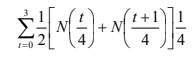

and is calculated to be 481, since the number of claims during this
period is reported to be 183, the claim frequency rate is said to be 183/481 and
equals 0.38.

When the period is extended to k years and total number of claims
booked each year are assumed to be exposure to risk for that year, then **total** **exposure to risk** becomes **N1+N2+...+Nk.**. The total number of claims given by **C1+C2+...+Ck**. therefore yields the **claim frequency rate** to be calculated by the formula:

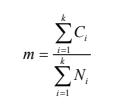


where **m** is the **claim frequency rate** which is assumed to be **constant**
during **k years**.

In [ ]:
#The frequency claim rate (risk premium rate) for a period from jan to feb 2011

df["Total Claim Amount"].sum()/df["Number of Policies"].count()

434.0887943128969

6. On the implications of the **mean claim sizes** and **total number** **of** **claims booked** by the company the **growth rate** can be **calculated**. In the **growth rates** **geometric progression** can be **assumed** or both **geometric and arithmetic progressions** can be assumed.

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# **Testing Other Variables**

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df["Renew Offer Type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [ ]:
df.groupby(["Renew Offer Type"]).sum()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Renew Offer Type,,,,,,,,
Offer1,3.266899e+07,115429279,363746,57021,193012,1661,11996,1.760309e+06
Offer2,2.164290e+07,128787747,263451,44531,133845,939,8269,1.196085e+06
Offer3,1.145297e+07,55206131,132400,21288,68001,551,4250,6.062970e+05
Offer4,7.352266e+06,44539352,91868,15056,44164,360,2578,4.022754e+05


In [ ]:
df["Sales Channel"].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [ ]:
df["Number of Open Complaints"].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

In [ ]:
df.groupby(["Number of Policies"]).sum()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount
Number of Policies,,,,,,,
1,1.172621e+07,123732439,306308,48694,157121,1271,1.431346e+06
2,3.606897e+07,84881563,213942,34513,109682,836,9.947028e+05
3,8.159897e+06,46270348,106445,17933,57497,453,4.858528e+05
4,2.861856e+06,13846730,37604,6017,19432,150,1.753756e+05
5,2.890982e+06,14692851,38082,6140,19284,179,1.745033e+05
6,2.581916e+06,15709006,33660,5586,18215,151,1.528781e+05
7,3.133630e+06,14862993,41108,7011,19913,174,2.028179e+05
8,2.745121e+06,14641198,35760,5866,18615,150,1.708992e+05
9,2.948543e+06,15325381,38556,6136,19263,147,1.765919e+05
